# Separable and non-separable data

In [4]:
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression


## separable dataset

In [5]:
resolution=500
L1=np.linspace(-0.5,10.5,num=resolution)
L2=np.linspace(-0.5,10.5,num=resolution)
XX,YY=np.meshgrid(L1,L2)

X=np.random.random(size=(100,2))*10
fun=lambda x: 0.4*x+2
X=np.array([x for x in np.random.random(size=(120,2))*10 if abs(fun(x[0])-x[1])>0.5])

y=np.array([fun(x[0])>x[1] for x in X])

logreg=LogisticRegression(solver='lbfgs')
logreg.fit(X,y)
Z=logreg.predict(np.array([XX.flatten(),YY.flatten()]).T)
Z=Z.reshape(XX.shape)


## non-separable dataset

In [6]:
def label(X,angle=30,shift=[-5,-3],a=0.3):
    X=X+np.array([shift])
    angle=math.radians(angle)
    return a*(X[:,0]*math.cos(angle)-X[:,1]*math.sin(angle))**2<(X[:,0]*math.sin(angle)+X[:,1]*math.cos(angle))
X_nonsep=np.random.random(size=(100,2))*10
y_nonsep=label(X_nonsep)


resolution=500
L1_nonsep=np.linspace(-0.5,10.5,num=resolution)
L2_nonsep=np.linspace(-0.5,10.5,num=resolution)
XX_nonsep,YY_nonsep=np.meshgrid(L1_nonsep,L2_nonsep)

In [7]:
logreg=LogisticRegression(solver='lbfgs')
logreg.fit(X_nonsep,y_nonsep)

Z_nonsep=logreg.predict(np.array([XX_nonsep.flatten(),YY_nonsep.flatten()]).T)
Z_nonsep=Z_nonsep.reshape(XX_nonsep.shape)


## both in one pic

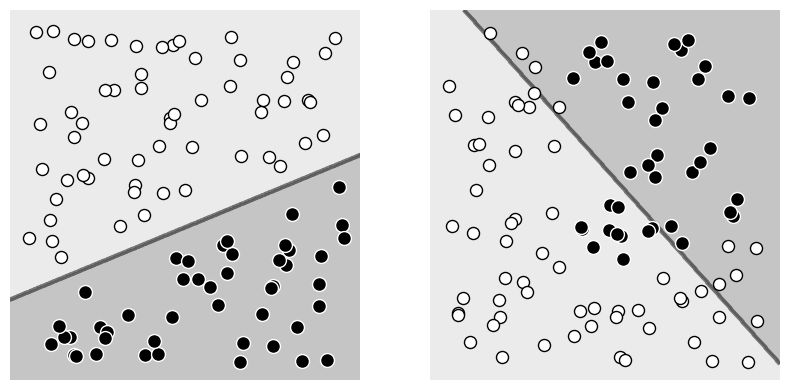

In [10]:
plt.style.use("lecture.mplstyle")

_,axs=plt.subplots(1,2,figsize=(8,4))

#axs[0].contourf(XX,YY,Z,alpha=0.2,colors=["w","k"])
axs[0].contourf(XX,YY,Z,alpha=0.3,cmap="binary",levels=1)
axs[0].contour(XX,YY,Z,alpha=0.5,colors='black',zorder=5)
#axs[0].scatter(X[:,0],X[:,1],c=y_setosa,edgecolor='black',cmap='binary')
whites=X[y!=1]
blacks=X[y==1]
axs[0].scatter(whites[:,0],whites[:,1],color="w",edgecolor='black',s=75,zorder=5)
axs[0].scatter(blacks[:,0],blacks[:,1],color="k",edgecolor='w',s=100,zorder=5)

#axs[0].tick_params(left = False, right = False , labelleft = False , 
#                labelbottom = False, bottom = False) 
axs[0].set_xticks([])
axs[0].set_yticks([])

#axs[1].contourf(XX_nonsep,YY_nonsep,Z_nonsep,alpha=0.2,colors=["w","k"])
axs[1].contourf(XX_nonsep,YY_nonsep,Z_nonsep,alpha=0.3,cmap="binary",levels=1)
axs[1].contour(XX_nonsep,YY_nonsep,Z_nonsep,alpha=0.5,colors='black',zorder=5)
whites_nonsep=X_nonsep[y_nonsep==0]
blacks_nonsep=X_nonsep[y_nonsep==1]
axs[1].scatter(whites_nonsep[:,0],whites_nonsep[:,1],color="w",edgecolor='black',s=75,zorder=5)
axs[1].scatter(blacks_nonsep[:,0],blacks_nonsep[:,1],color="k",edgecolor='w',s=100,zorder=5)

#axs[1].tick_params(left = False, right = False , labelleft = False , 
#                labelbottom = False, bottom = False) 
axs[1].set_xticks([])
axs[1].set_yticks([])
plt.tight_layout(w_pad=5.)
plt.savefig("sep_and_non_sep.png",dpi=300)